## Name: Pieter Johannes Alberts (Johann Alberts)
## Student Number: 22179046

## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import manifold #needed for multidimensional scaling (MDS) and t-SNE
from sklearn import cluster #needed for k-Means clustering
from sklearn import preprocessing #needed for scaling attributes to the nterval [0,1]
from sklearn import metrics

## Load data

In [2]:
df = pd.read_csv("./loans_train_prepared-1.csv")
data = np.array(df.values, dtype=float)
print('(number of examples, number of attributes): ', data.shape)

(number of examples, number of attributes):  (614, 16)


In [3]:
# Inspect head of dataframe
df.head(5)

Dependents  ApplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
0    0.000000         1.084523    1.058140              0.75               1   
1    0.333333         0.925883    1.047319              0.75               1   
2    0.000000         0.683858    0.635920              0.75               1   
3    0.000000         0.608992    1.002824              0.75               1   
4    0.000000         1.101869    1.115650              0.75               1   

   Gender_Male  Gender_nan  Married_Yes  Married_nan  Self_Employed_Yes  \
0            1           0            0            0                  0   
1            1           0            1            0                  0   
2            1           0            1            0                  1   
3            1           0            1            0                  0   
4            1           0            0            0                  0   

   Self_Employed_nan  Education_Not Graduate  Property_Area_Semiurban  \
0                  0                       0                        0   
1                  0                       0                        0   
2                  0                       0                        0   
3                  0                       1                        0   
4                  0                       0                        0   

   Property_Area_Urban  Loan_Status_Y  TotalIncome  
0                    1              1     0.841086  
1                    0              0     0.871711  
2                    1              1     0.385189  
3                    1              1     0.717012  
4                    1              1     0.860305

In [4]:
# Inspect tail of dataframe
df.tail(5)

Dependents  ApplicantIncome  LoanAmount  Loan_Amount_Term  \
609    0.000000         0.666409    0.676143             0.750   
610    1.000000         0.858916    0.395858             0.375   
611    0.333333         1.313719    1.566110             0.750   
612    0.666667         1.267616    1.325676             0.750   
613    0.000000         0.925883    1.074155             0.750   

     Credit_History  Gender_Male  Gender_nan  Married_Yes  Married_nan  \
609               1            0           0            0            0   
610               1            1           0            1            0   
611               1            1           0            1            0   
612               1            1           0            1            0   
613               0            0           0            0            0   

     Self_Employed_Yes  Self_Employed_nan  Education_Not Graduate  \
609                  0                  0                       0   
610                  0                  0                       0   
611                  0                  0                       0   
612                  0                  0                       0   
613                  1                  0                       0   

     Property_Area_Semiurban  Property_Area_Urban  Loan_Status_Y  TotalIncome  
609                        0                    0              1     0.364708  
610                        0                    0              1     0.587496  
611                        0                    1              1     1.116075  
612                        0                    1              1     1.042256  
613                        1                    0              0     0.663523

## Quick EDA

In [5]:
# Get dataframe info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Dependents               614 non-null    float64
 1   ApplicantIncome          614 non-null    float64
 2   LoanAmount               614 non-null    float64
 3   Loan_Amount_Term         614 non-null    float64
 4   Credit_History           614 non-null    int64  
 5   Gender_Male              614 non-null    int64  
 6   Gender_nan               614 non-null    int64  
 7   Married_Yes              614 non-null    int64  
 8   Married_nan              614 non-null    int64  
 9   Self_Employed_Yes        614 non-null    int64  
 10  Self_Employed_nan        614 non-null    int64  
 11  Education_Not Graduate   614 non-null    int64  
 12  Property_Area_Semiurban  614 non-null    int64  
 13  Property_Area_Urban      614 non-null    int64  
 14  Loan_Status_Y            6

In [6]:
df.isnull().sum()

Dependents                 0
ApplicantIncome            0
LoanAmount                 0
Loan_Amount_Term           0
Credit_History             0
Gender_Male                0
Gender_nan                 0
Married_Yes                0
Married_nan                0
Self_Employed_Yes          0
Self_Employed_nan          0
Education_Not Graduate     0
Property_Area_Semiurban    0
Property_Area_Urban        0
Loan_Status_Y              0
TotalIncome                0
dtype: int64

In [7]:
# View description of numerical attributes
df.describe()

Dependents  ApplicantIncome  LoanAmount  Loan_Amount_Term  \
count  614.000000       614.000000  614.000000        614.000000   
mean     0.248100         0.916588    1.076222          0.713355   
std      0.336541         0.412366    0.338744          0.134226   
min      0.000000         0.004634    0.005026          0.025000   
25%      0.000000         0.662440    0.883668          0.750000   
50%      0.000000         0.815365    1.047319          0.750000   
75%      0.333333         1.078246    1.229571          0.750000   
max      1.000000         3.357480    2.461145          1.000000   

       Credit_History  Gender_Male  Gender_nan  Married_Yes  Married_nan  \
count      614.000000   614.000000  614.000000   614.000000   614.000000   
mean         0.855049     0.796417    0.021173     0.648208     0.004886   
std          0.352339     0.402991    0.144077     0.477919     0.069786   
min          0.000000     0.000000    0.000000     0.000000     0.000000   
25%          1.000000     1.000000    0.000000     0.000000     0.000000   
50%          1.000000     1.000000    0.000000     1.000000     0.000000   
75%          1.000000     1.000000    0.000000     1.000000     0.000000   
max          1.000000     1.000000    1.000000     1.000000     1.000000   

       Self_Employed_Yes  Self_Employed_nan  Education_Not Graduate  \
count         614.000000         614.000000              614.000000   
mean            0.133550           0.052117                0.218241   
std             0.340446           0.222445                0.413389   
min             0.000000           0.000000                0.000000   
25%             0.000000           0.000000                0.000000   
50%             0.000000           0.000000                0.000000   
75%             0.000000           0.000000                0.000000   
max             1.000000           1.000000                1.000000   

       Property_Area_Semiurban  Property_Area_Urban  Loan_Status_Y  \
count               614.000000           614.000000     614.000000   
mean                  0.379479             0.328990       0.687296   
std                   0.485653             0.470229       0.463973   
min                   0.000000             0.000000       0.000000   
25%                   0.000000             0.000000       0.000000   
50%                   0.000000             0.000000       1.000000   
75%                   1.000000             1.000000       1.000000   
max                   1.000000             1.000000       1.000000   

       TotalIncome  
count   614.000000  
mean      0.862686  
std       0.428068  
min       0.005599  
25%       0.597383  
50%       0.783902  
75%       1.035796  
max       3.207353

## Rescale the data 

In [8]:
# Rescale full original dataset
min_max_scaler = preprocessing.MinMaxScaler()
data_rescaled = min_max_scaler.fit_transform(data)

In [9]:
# Create dataframe from all scaled attributes
df_scaled = pd.DataFrame(data_rescaled, columns=df.columns)

In [10]:
df_scaled.head()

Dependents  ApplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
0    0.000000         0.322081    0.428772           0.74359             1.0   
1    0.333333         0.274766    0.424366           0.74359             1.0   
2    0.000000         0.202582    0.256866           0.74359             1.0   
3    0.000000         0.180252    0.406250           0.74359             1.0   
4    0.000000         0.327255    0.452187           0.74359             1.0   

   Gender_Male  Gender_nan  Married_Yes  Married_nan  Self_Employed_Yes  \
0          1.0         0.0          0.0          0.0                0.0   
1          1.0         0.0          1.0          0.0                0.0   
2          1.0         0.0          1.0          0.0                1.0   
3          1.0         0.0          1.0          0.0                0.0   
4          1.0         0.0          0.0          0.0                0.0   

   Self_Employed_nan  Education_Not Graduate  Property_Area_Semiurban  \
0                0.0                     0.0                      0.0   
1                0.0                     0.0                      0.0   
2                0.0                     0.0                      0.0   
3                0.0                     1.0                      0.0   
4                0.0                     0.0                      0.0   

   Property_Area_Urban  Loan_Status_Y  TotalIncome  
0                  1.0            1.0     0.260947  
1                  0.0            0.0     0.270512  
2                  1.0            1.0     0.118557  
3                  1.0            1.0     0.222195  
4                  1.0            1.0     0.266949

## Task 2

- Plot the sum of squared distances from the data points (in loans_train_prepared.csv) to the centers of the k-means clusters for various values of k. Use the Elbow method to pick the best value of k. Attempt also another method for determining the best value of k. Use the best value(s) of k to cluster the loans_train_prepared dataset with k-means. Aim at producing meaningful clustering.
- Use at least two different methods for visualising the clustering.

In [11]:
import warnings
warnings.filterwarnings('ignore')

In [12]:
def generate_data_for_kmeans():
    kmeans_data = {}
    for n_cluster in range(2, 7):
        kmeans = cluster.KMeans(n_clusters=n_cluster, n_init=10, max_iter=1000, random_state=42).fit(data_rescaled)
        labels = kmeans.labels_
        cluster_labels = kmeans.fit_predict(data_rescaled)
        sil_coeff = metrics.silhouette_score(data_rescaled, cluster_labels)
        kmeans_data[n_cluster] = {
            'sil_coeff': sil_coeff,
            'labels': labels,
            'cluster_labels': cluster_labels,
            'sil_samples': metrics.silhouette_samples(data_rescaled, cluster_labels),
            'inertia': kmeans.inertia_,
            'cluster_centers': kmeans.cluster_centers_
        }
        print("For n_clusters={}, The Silhouette Coefficient is {}".format(n_cluster, sil_coeff))
    return kmeans_data

In [13]:
# Generate K-means data for silhouette coefficients
# labels, silhouette samples, intertia and cluster centres
kmeans_data = generate_data_for_kmeans()

For n_clusters=2, The Silhouette Coefficient is 0.18654028464861303
For n_clusters=3, The Silhouette Coefficient is 0.1915495261821749
For n_clusters=4, The Silhouette Coefficient is 0.1905304548646992
For n_clusters=5, The Silhouette Coefficient is 0.20484154794550358
For n_clusters=6, The Silhouette Coefficient is 0.204037798750345


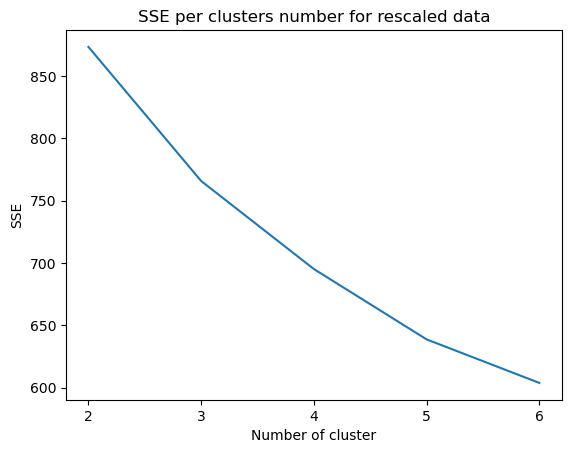

In [14]:
inertia = [kmeans_data[k]['inertia'] for k in list(kmeans_data.keys())]
plt.figure()
plt.plot(list(kmeans_data.keys()), inertia)
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.title("SSE per clusters number for rescaled data")
plt.xticks(range(2, 7))
plt.show()

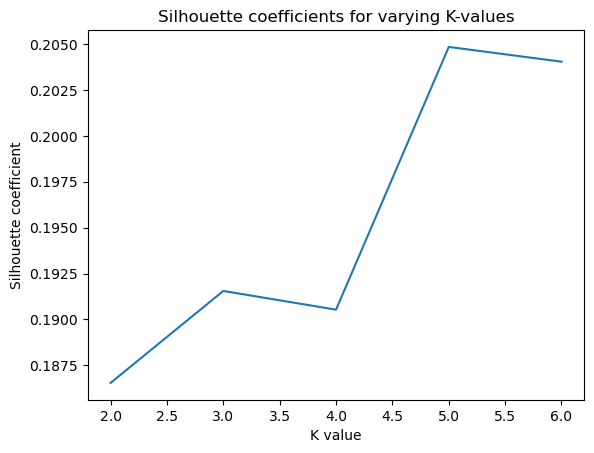

In [15]:
sil_coeff = [val['sil_coeff'] for val in kmeans_data.values()]
plt.plot(list(kmeans_data.keys()), sil_coeff)
plt.xlabel('K value')
plt.ylabel('Silhouette coefficient')
plt.title('Silhouette coefficients for varying K-values');

> The function below is a combination of code taken from [this article on Towards Data Science](https://towardsdatascience.com/silhouette-method-better-than-elbow-method-to-find-optimal-clusters-378d62ff6891) and the sample plotting function provided in our E-tivity example notebook.

In [16]:
def plot_kmeans_data(kmeans_data):
    colors = np.array(['green', 'purple', 'orange', 'blue', 'lime', 'yellow', 'pink', 'khaki'])
    for i in list(kmeans_data.keys()):
        fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
        fig.set_size_inches(18, 7)
        ax1.set_xlim([-0.2, 0.4])
        ax1.set_ylim([0, len(data_rescaled) + (i + 1) * 10])
        
        labels = kmeans_data[i]['cluster_labels']
        silhouette_score = kmeans_data[i]['sil_coeff']
        silhouette_samples = kmeans_data[i]['sil_samples']
        y_lower = 10
        
        for j in range(i):
            jth_cluster_silhouette_values = silhouette_samples[labels == j]
            jth_cluster_silhouette_values.sort()
            size_cluster_j = jth_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_j
            color = colors[j % colors.size]
        
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                              0,
                              jth_cluster_silhouette_values,
                              facecolor=color,
                              edgecolor=color,
                              alpha=0.7)
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_j, str(j))
            y_lower = y_upper + 10

        ax1.axvline(x=silhouette_score, color="red", linestyle="--")
        ax1.set_yticks([])
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        ax1.set_title("Silhouette plot for various K-means clusters.")
        ax1.set_xlabel("Silhouette coefficients")
        ax1.set_ylabel("Cluster label")
        
        data_and_centers_mds = np.r_[data_rescaled, kmeans_data[i]['cluster_centers']]
        XYcoordinates_MDS = manifold.MDS(n_components=2).fit_transform(data_and_centers_mds)
        data_and_centers_tsne = np.r_[data_rescaled, kmeans_data[i]['cluster_centers']]
        XYcoordinates_TSNE = manifold.TSNE(n_components=2).fit_transform(data_and_centers_tsne)
        
        points = XYcoordinates_MDS[:-i,:]
        centers = XYcoordinates_MDS[-i:,:]
        for cluster in range(i):
            ax2.scatter(points[labels==cluster,0],
                        points[labels==cluster,1], 
                        c=colors[cluster%colors.size],
                        label='cluster '+str(cluster))
        ax2.set_title(f'2D MDS plot for K-means clusters with k={i}')
        ax2.legend()

        # plot the centers of the clusters
        if centers is not None:
            ax2.scatter(centers[:,0], centers[:,1], c='r', marker='X', s=500)

        points = XYcoordinates_TSNE[:-i,:]
        centers = XYcoordinates_TSNE[-i:,:]
        for cluster in range(i):
            ax3.scatter(points[labels==cluster,0],
                        points[labels==cluster,1], 
                        c=colors[cluster%colors.size],
                        label='cluster '+str(cluster))
        ax3.set_title(f'2D T-SNE plot for K-means clusters with k={i}')
        ax3.legend()

        # plot the centers of the clusters
        if centers is not None:
            ax3.scatter(centers[:,0], centers[:,1], c='r', marker='X', s=500)

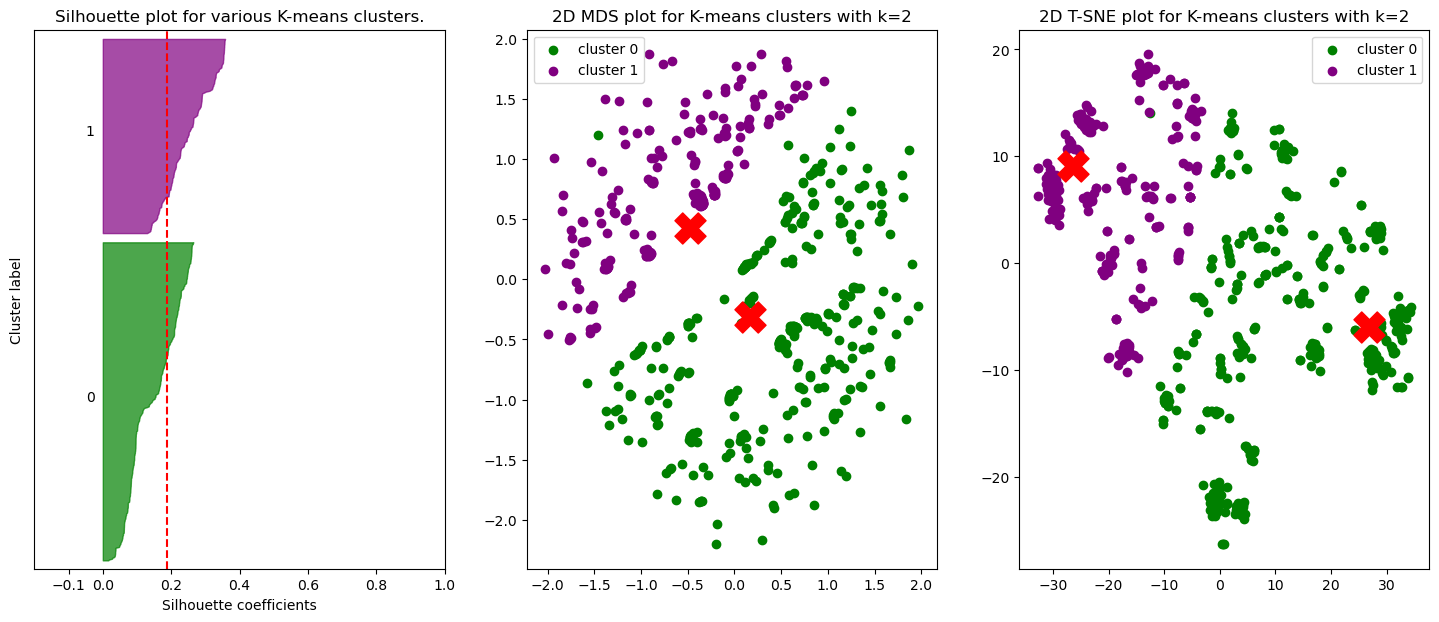

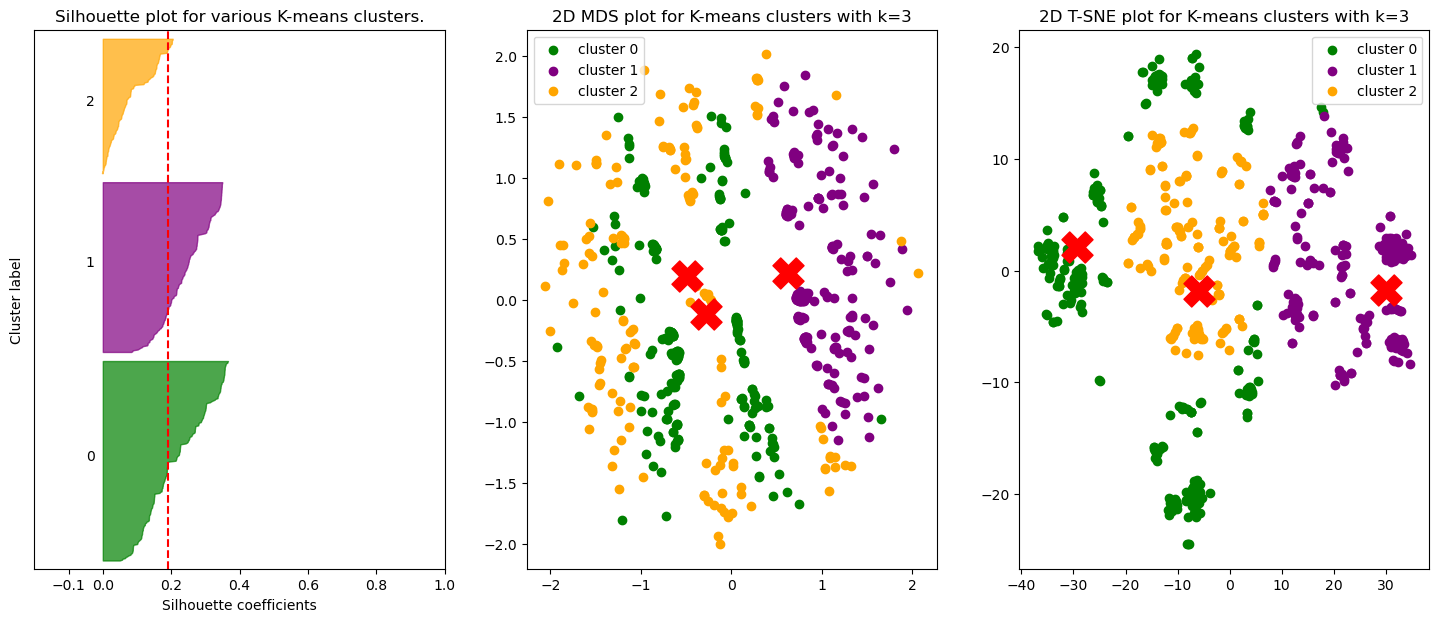

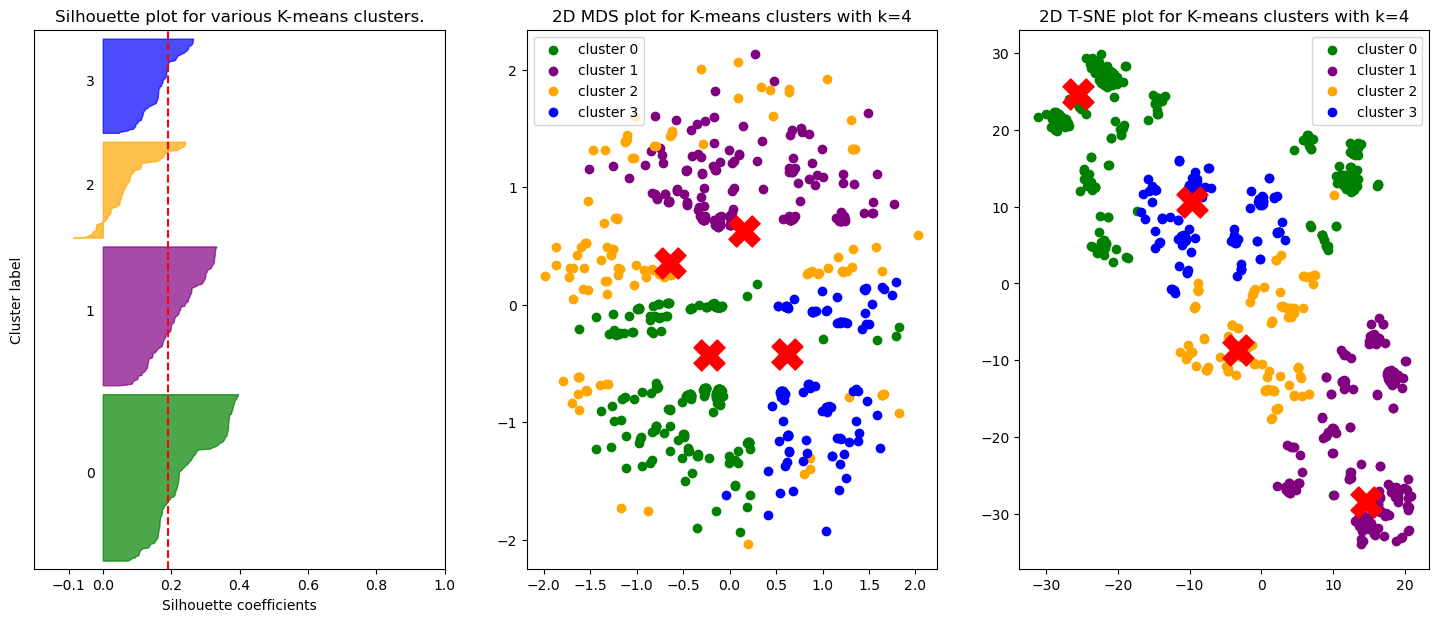

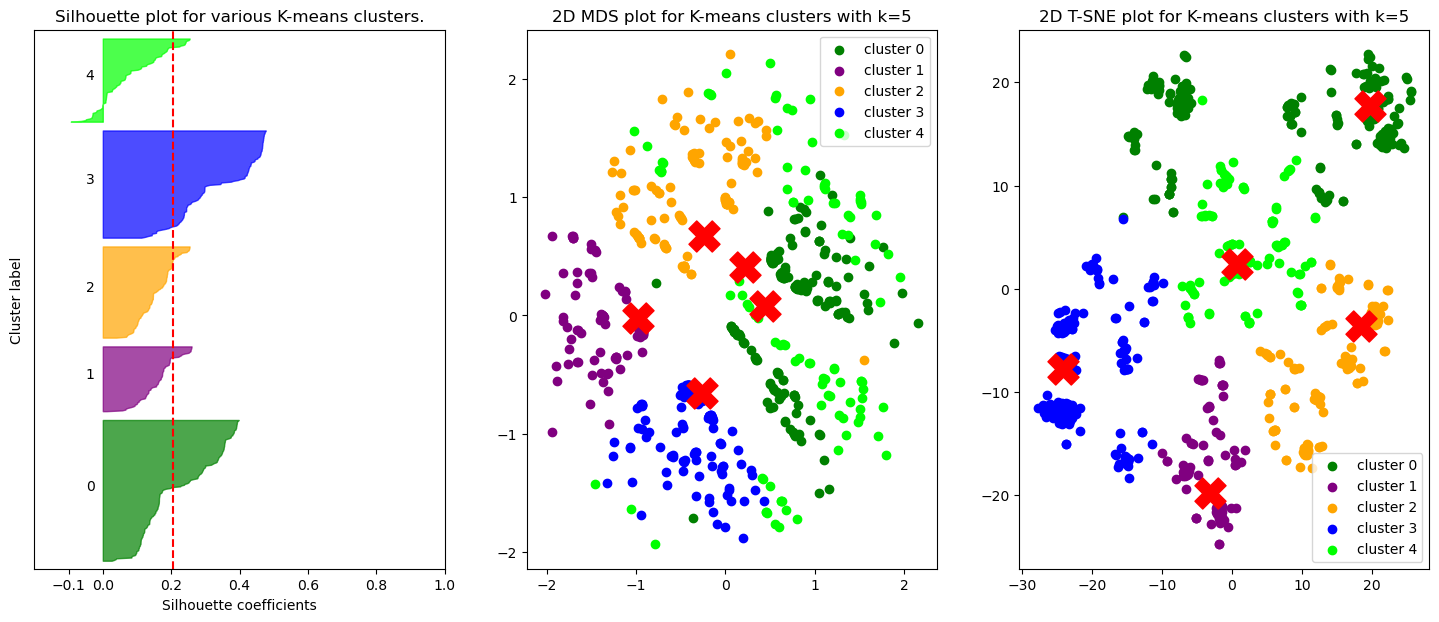

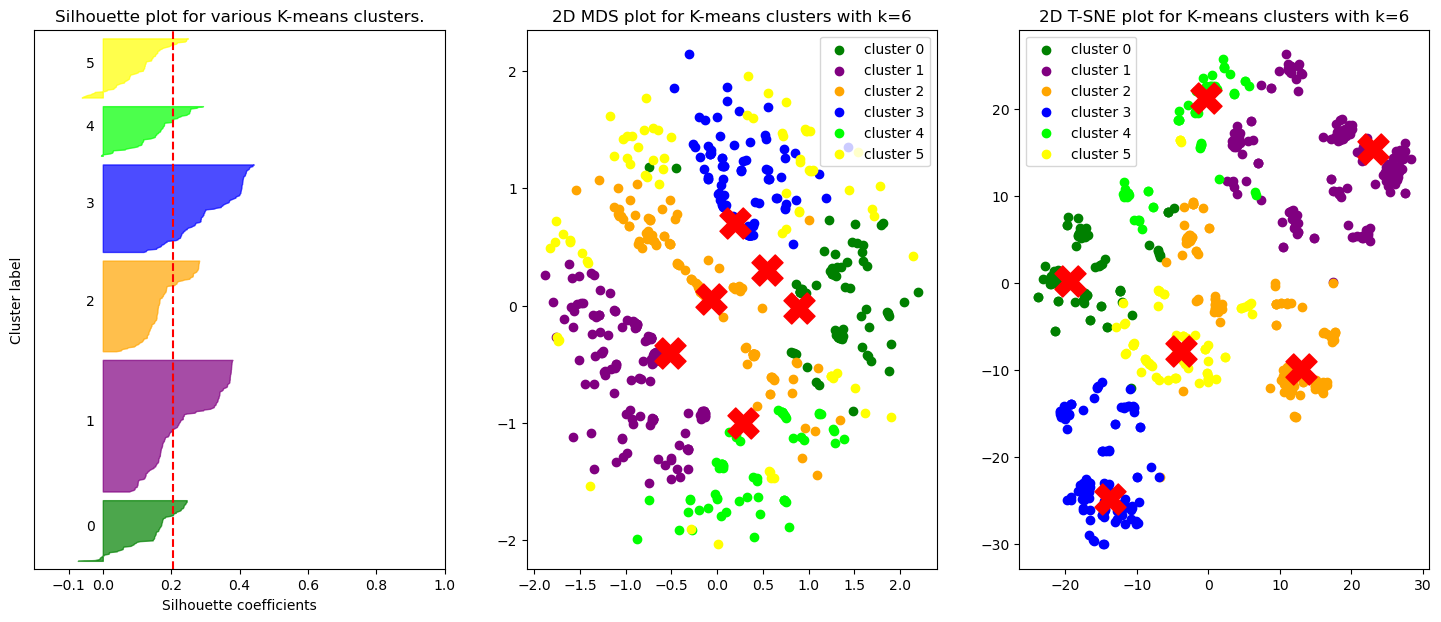

In [17]:
plot_kmeans_data(kmeans_data)

### Write a short conclusion about the characteristics of the clusters (max 250 words in a markdown cell)

- 3 was identified as the best K value, though 5 could be another candidate looking at:
  - the elbows at 3 and 5 in the SSE plot
  - the two peaks in the Silhouette coefficients plot
- Unfortunately, the Silhouette sample plots didn’t show a clear value for K where all clusters exceed the Silhouette score sufficiently to be considered an even spread of data per cluster
- Only for a K-value of 2 did MDS show a clear separation of clusters in our 2D space
- t-SNE consistently plotted less overlap between clusters in the 2D space, with both K-values of 2 and 3 showing no single plotted point in another cluster assuming that cluster shapes could assume any shape in the plot.

Interestingly, the orientation of the 2D projection changes for different values of K making visual inspection of cluster assignment of points a bit trickier.

Knowing that the dataset the data comes from is used to predict whether a loan is approved for a contact makes me think that we'd ultimately want two clusters only. Those who were given a loan and those who weren't. However, the elbow method cannot be used to evaluate K=2. The silhouette score for K=2 clearly shows that both clusters contain data entries exceeding the Silhouette score comfortably. Where K=3, the third cluster hardly contains any points exceeding the Silhouette score which suggests that K=3 might in fact not be the best K value. I have also noticed that the chosen random_state affects the SSE plot and Silhouette scores, so this is something to take into consideration as well.

## Task 3

- Use another clustering algorithm (from the ones available in scikit-learn) for the loans_train_prepared dataset and an appropriate manifold-learning technique to visualise it.

I decided to investigate two algorithms for Task 3, namely:

- DBSCAN (Density-Based Spatial Clustering of Applications with Noise)
  - Finds core samples of high density and expands clusters from them
  - More work was put into this to investigate the best `epsilon` and `min_samples` values
- Affinity Propagation
  - Recursively merges the pair of clusters that minimally increases a given linkage distance
  - Investigated various `preference` values

### DBSCAN

### epsilon optimisation

In [18]:
# Calculate distances between points and nearest neighbours
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(data_rescaled)
distances, indices = nbrs.kneighbors(data_rescaled)

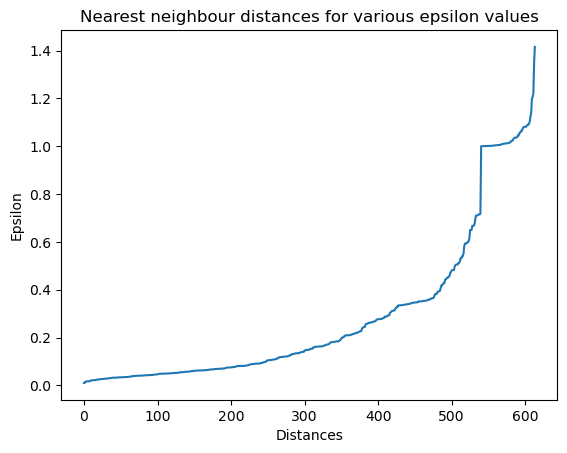

In [19]:
# Plot distances between points for various epsilon values to
# identify optimum value
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)
plt.title('Nearest neighbour distances for various epsilon values')
plt.xlabel('Distances')
plt.ylabel('Epsilon');

> The sharpest bend in the plot above shows the best value of epsilon. In this case, `epsilon=0.4` seems to show the sharpest bend for the lowest possible epsilon value. Lower epsilon values are considered better for DBSCAN.

#### min_samples optimisation

Taken from [this](https://medium.com/@tarammullin/dbscan-parameter-estimation-ff8330e3a3bd) article.

- The larger the data set, the larger the value of MinPts should be
- If the data set is noisier, choose a larger value of MinPts
- Generally, MinPts should be greater than or equal to the dimensionality of the data set
- For 2-dimensional data, use DBSCAN’s default value of MinPts = 4 (Ester et al., 1996)
- If your data has more than 2 dimensions, choose MinPts = 2*dim, where dim= the dimensions of your data set (Sander et al., 1998)

Based on the information above, the last points will be used to define a value for min_samples `(MinPts) = 2*dim`

In [20]:
# Get dimensions of dataset
df.shape

(614, 16)

> As there are 16 attributes, `min_samples` will be set at `16 * 2 = 32`

### Visualise clustering with: 

#### eps

- 0.4 (optimal according to plot)
- 0.5
- 0.6

#### min_samples

- 24
- 32 (optimum according to dimemsions * 2)
- 48

In [21]:
# Modify provided sample plotting function to plot on a particular axis
colors = np.array(['orange', 'blue', 'lime', 'black', 'khaki', 'pink', 'green', 'purple'])

def clustering_scatterplot(ax, points, labels, centers, title):
    n_clusters = np.unique(labels).size
    # Get unique labels
    unique_labels = list(set(labels))
    # Remove the noise label of -1
    unique_labels = [i for i in unique_labels if i != -1]
    for i in range(n_clusters):
        ax.scatter(points[labels==i,0],
                   points[labels==i,1], 
                   c=colors[i%colors.size],
                   label = 'cluster '+str(i))

    # plot the centers of the clusters
    if centers is not None:
        ax.scatter(centers[:,0], centers[:,1], c='r', marker='*', s=500)
    ax.set_title(title)
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.legend(unique_labels)

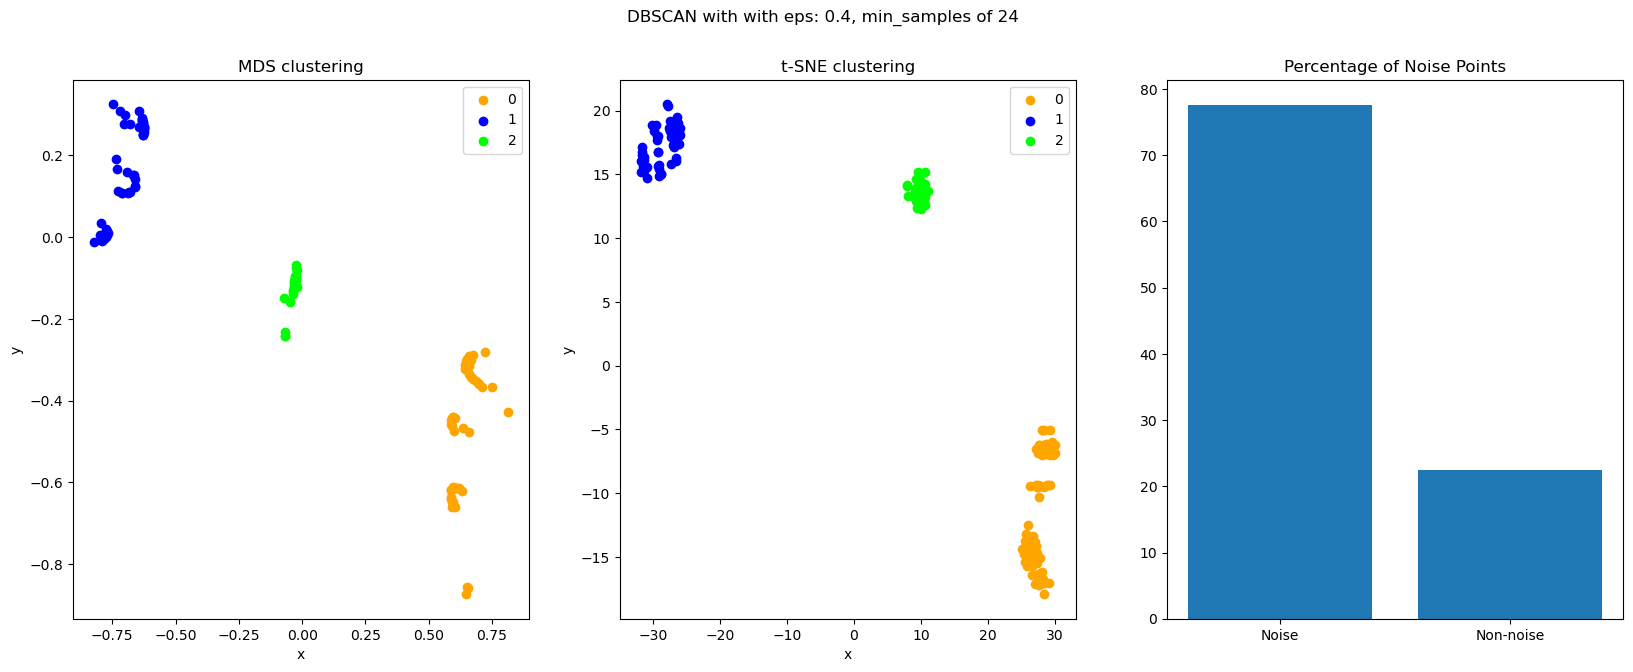

Estimated number of clusters for eps of 0.4 and min_samples of 24: 3.00
Estimated number of noise points for eps of 0.4 and min_samples of 24: 476.00
Unique clusters for eps of 0.4 and min_samples of 24: {0, 1, 2, -1}



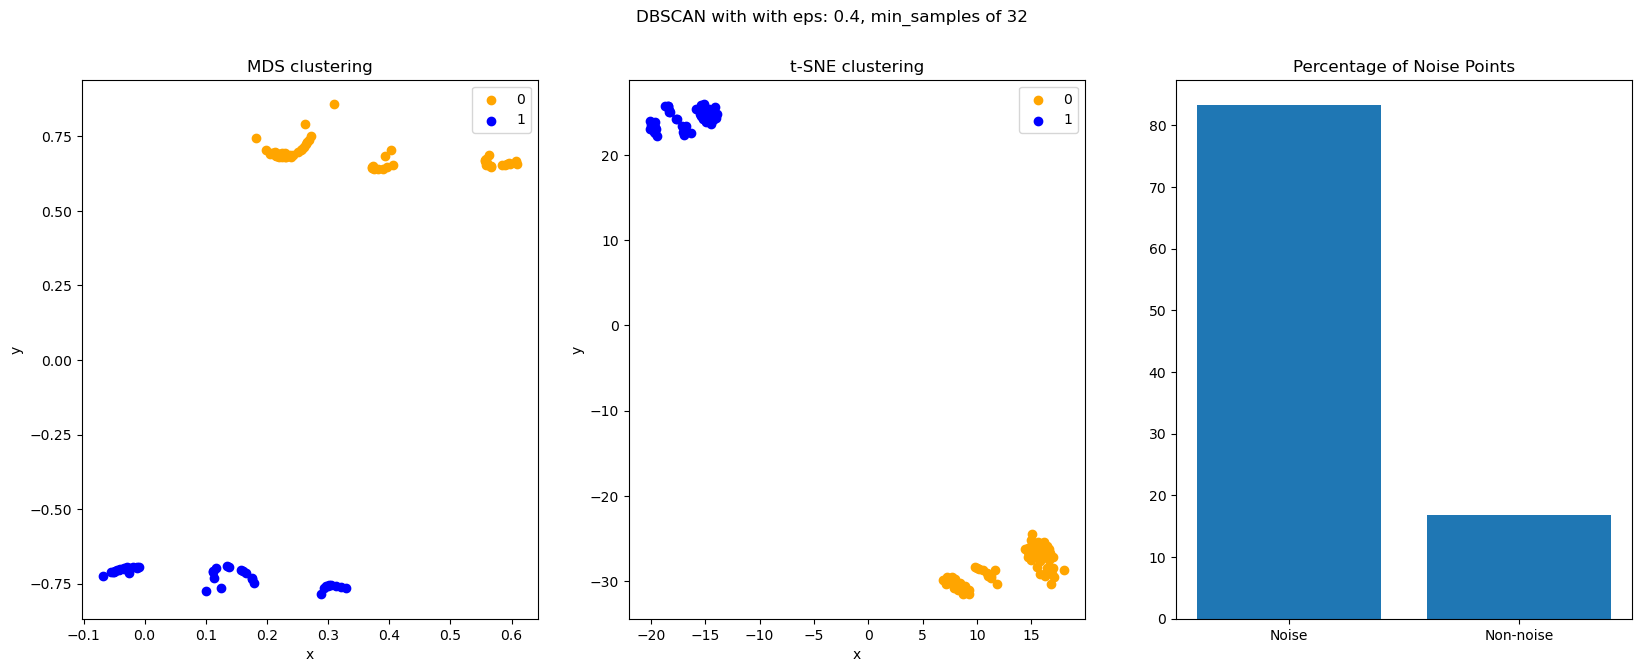

Estimated number of clusters for eps of 0.4 and min_samples of 32: 2.00
Estimated number of noise points for eps of 0.4 and min_samples of 32: 511.00
Unique clusters for eps of 0.4 and min_samples of 32: {0, 1, -1}



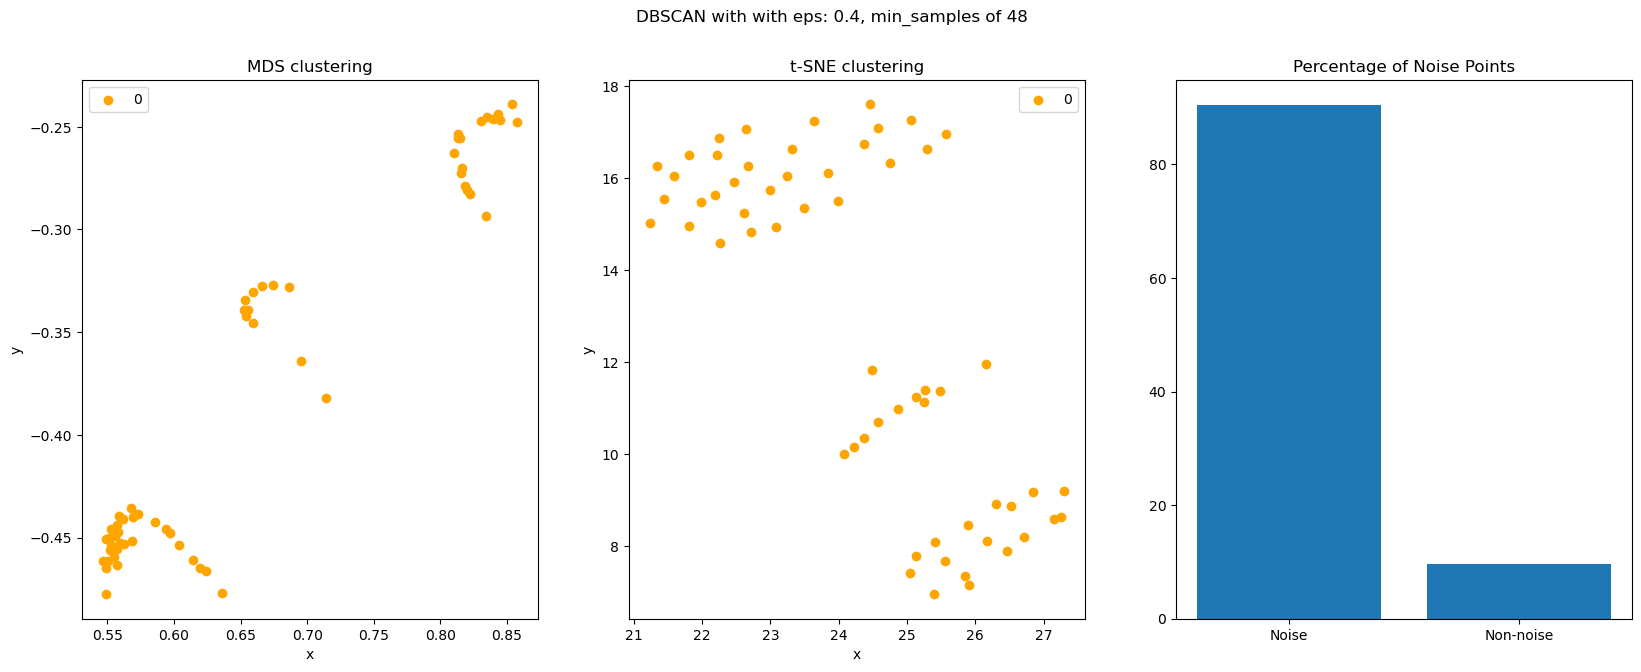

Estimated number of clusters for eps of 0.4 and min_samples of 48: 1.00
Estimated number of noise points for eps of 0.4 and min_samples of 48: 555.00
Unique clusters for eps of 0.4 and min_samples of 48: {0, -1}



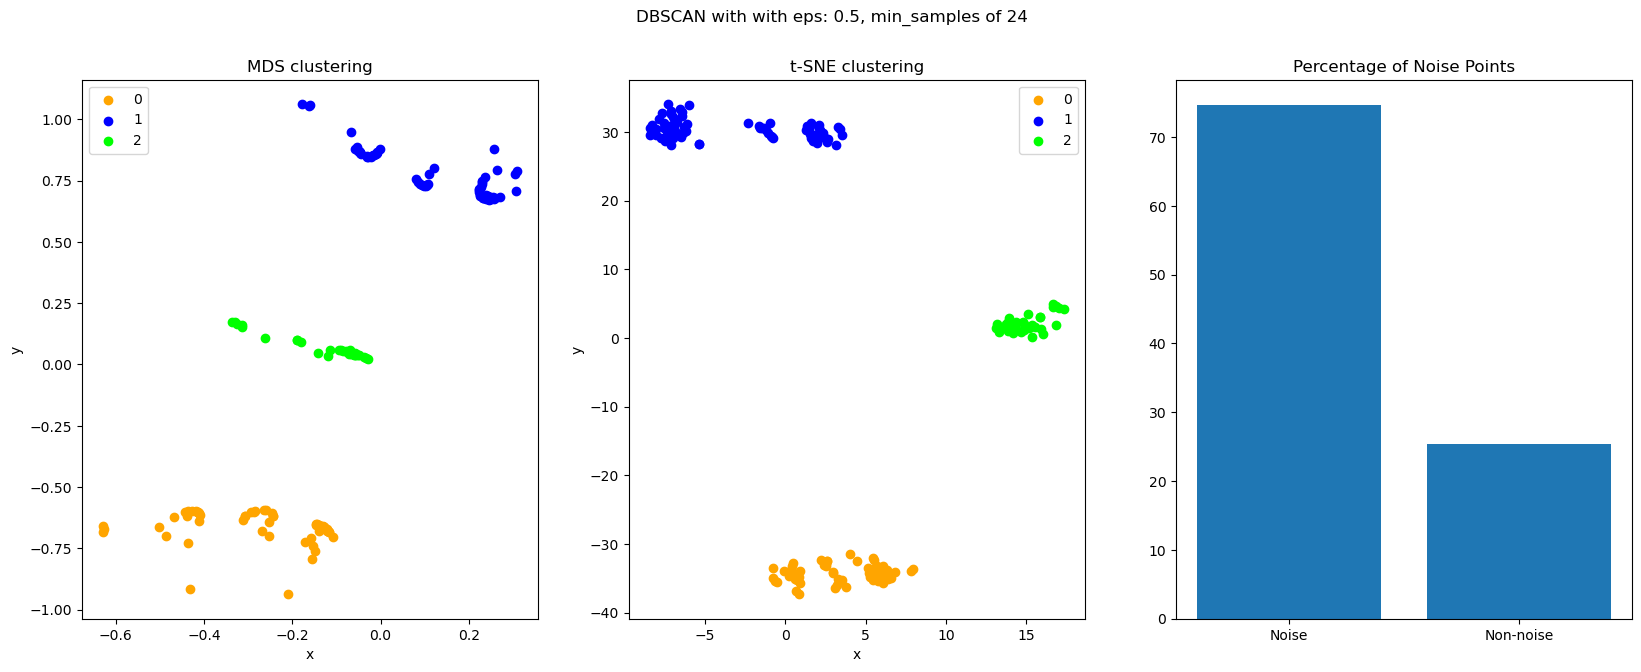

Estimated number of clusters for eps of 0.5 and min_samples of 24: 3.00
Estimated number of noise points for eps of 0.5 and min_samples of 24: 458.00
Unique clusters for eps of 0.5 and min_samples of 24: {0, 1, 2, -1}



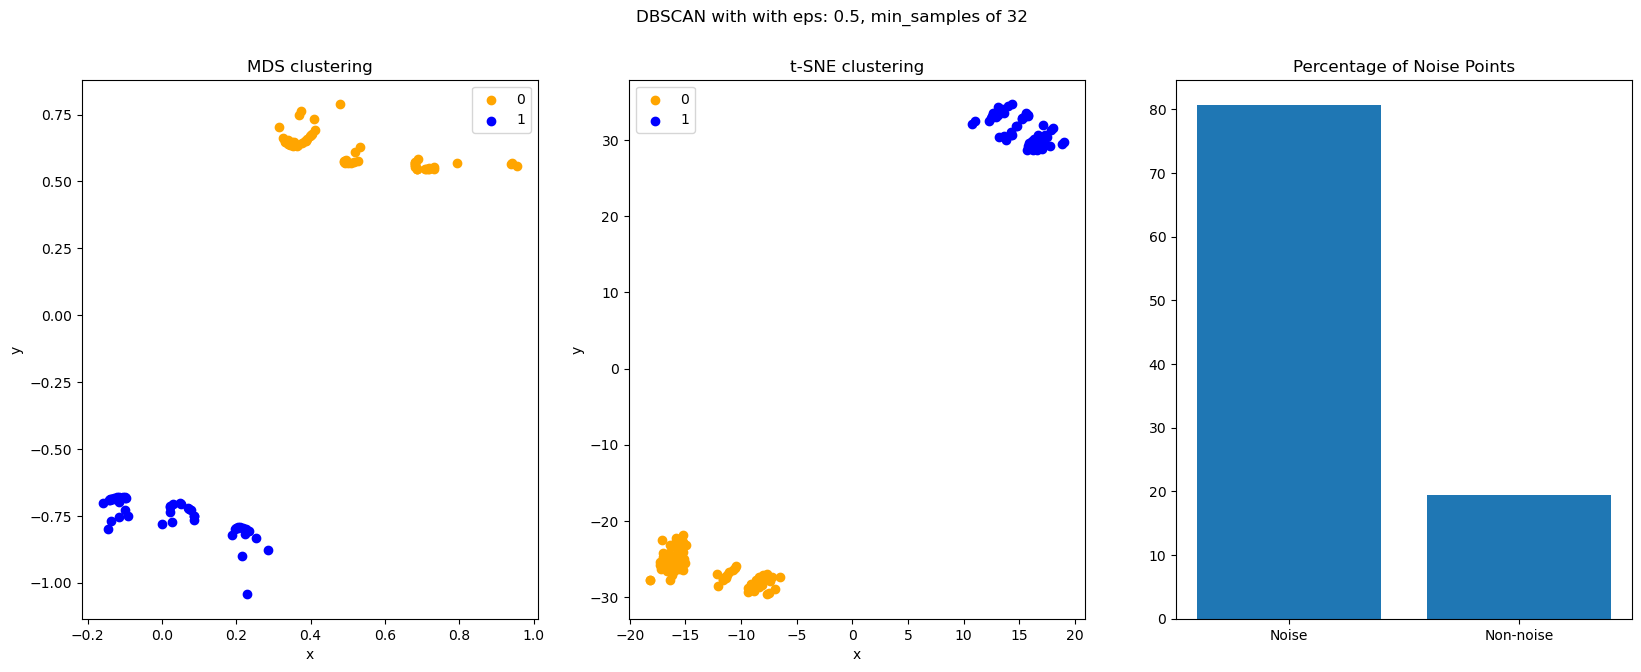

Estimated number of clusters for eps of 0.5 and min_samples of 32: 2.00
Estimated number of noise points for eps of 0.5 and min_samples of 32: 495.00
Unique clusters for eps of 0.5 and min_samples of 32: {0, 1, -1}



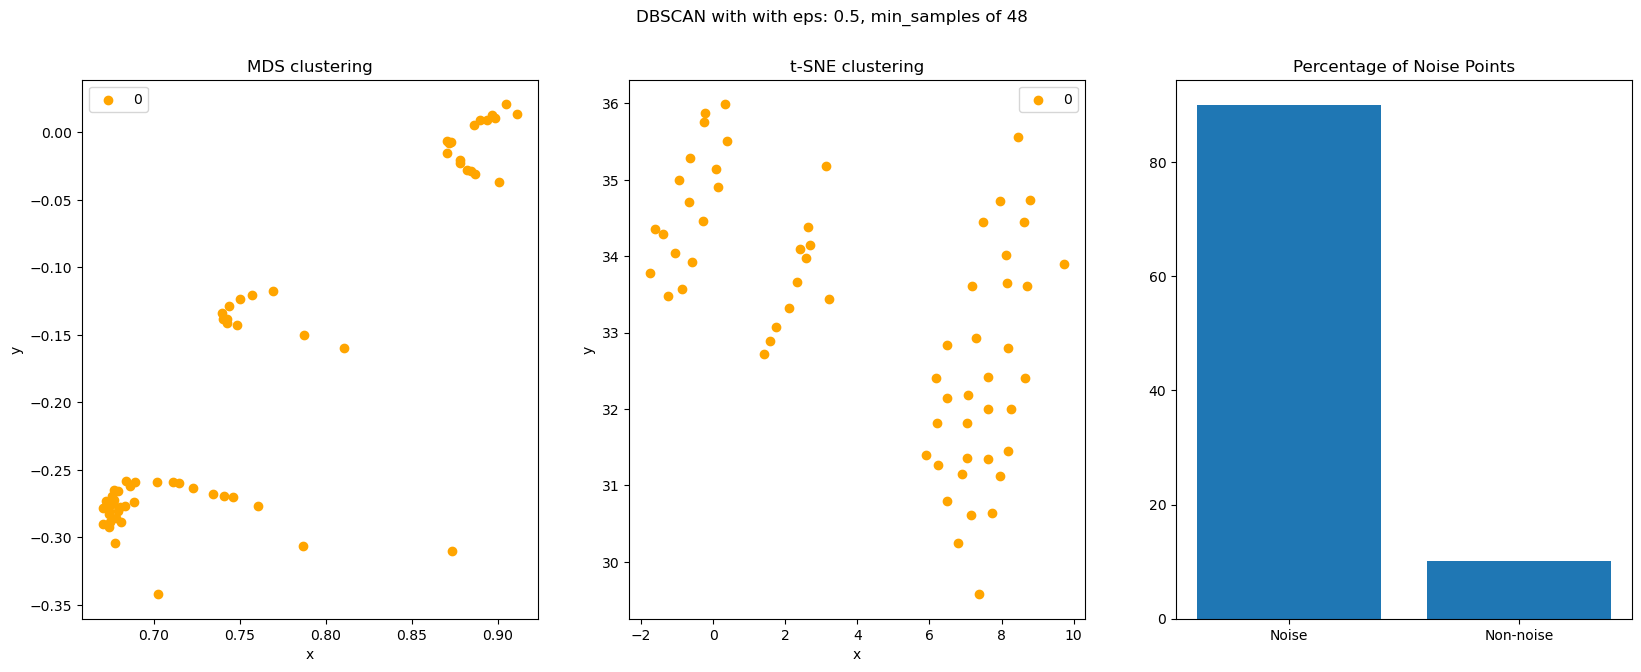

Estimated number of clusters for eps of 0.5 and min_samples of 48: 1.00
Estimated number of noise points for eps of 0.5 and min_samples of 48: 552.00
Unique clusters for eps of 0.5 and min_samples of 48: {0, -1}



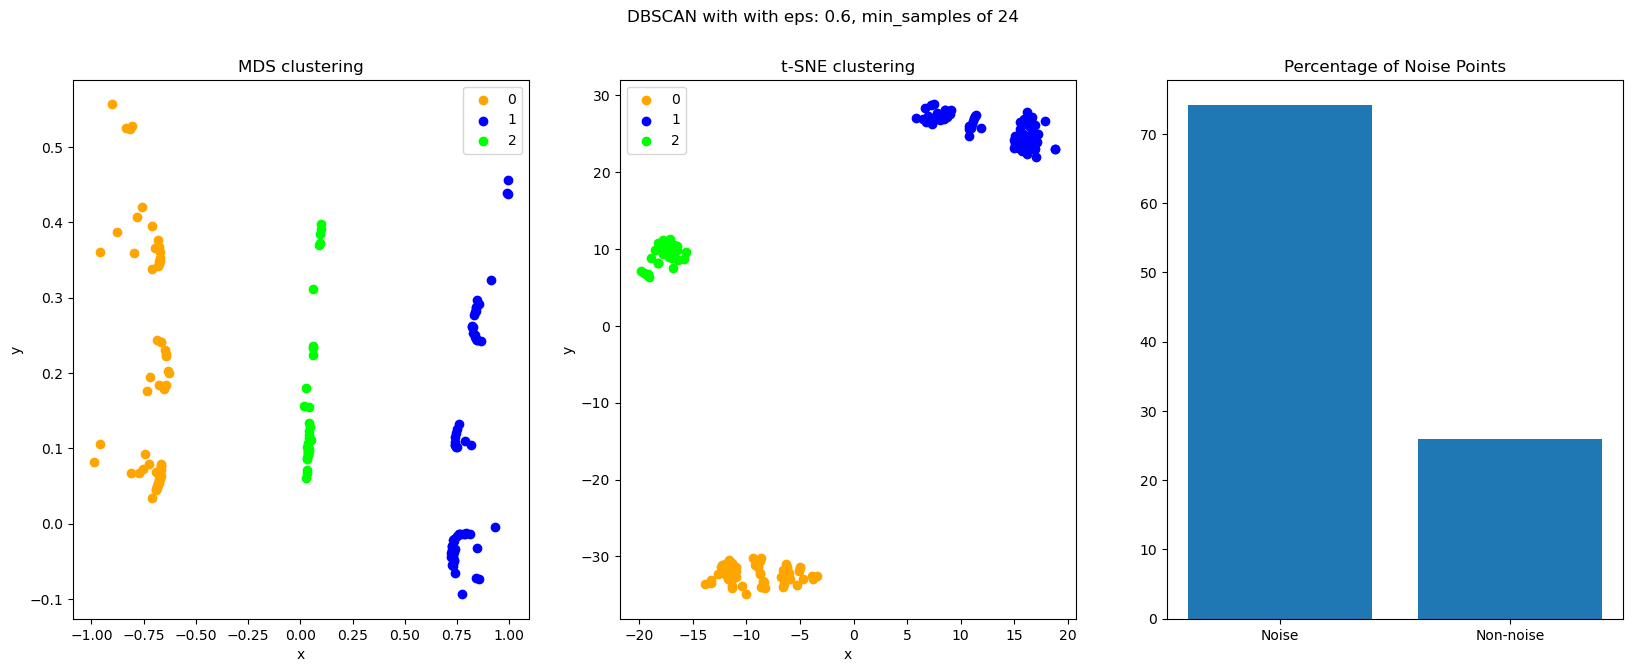

Estimated number of clusters for eps of 0.6 and min_samples of 24: 3.00
Estimated number of noise points for eps of 0.6 and min_samples of 24: 455.00
Unique clusters for eps of 0.6 and min_samples of 24: {0, 1, 2, -1}



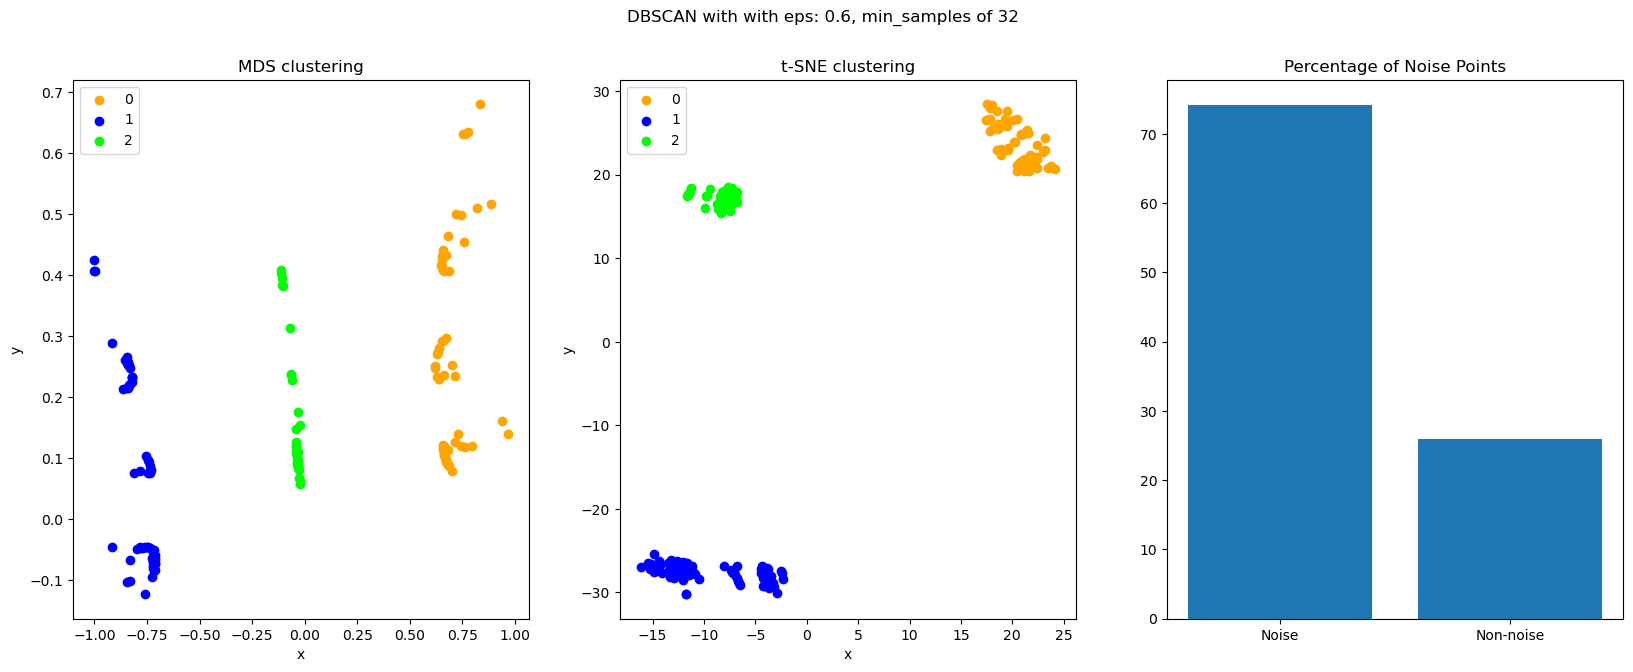

Estimated number of clusters for eps of 0.6 and min_samples of 32: 3.00
Estimated number of noise points for eps of 0.6 and min_samples of 32: 455.00
Unique clusters for eps of 0.6 and min_samples of 32: {0, 1, 2, -1}



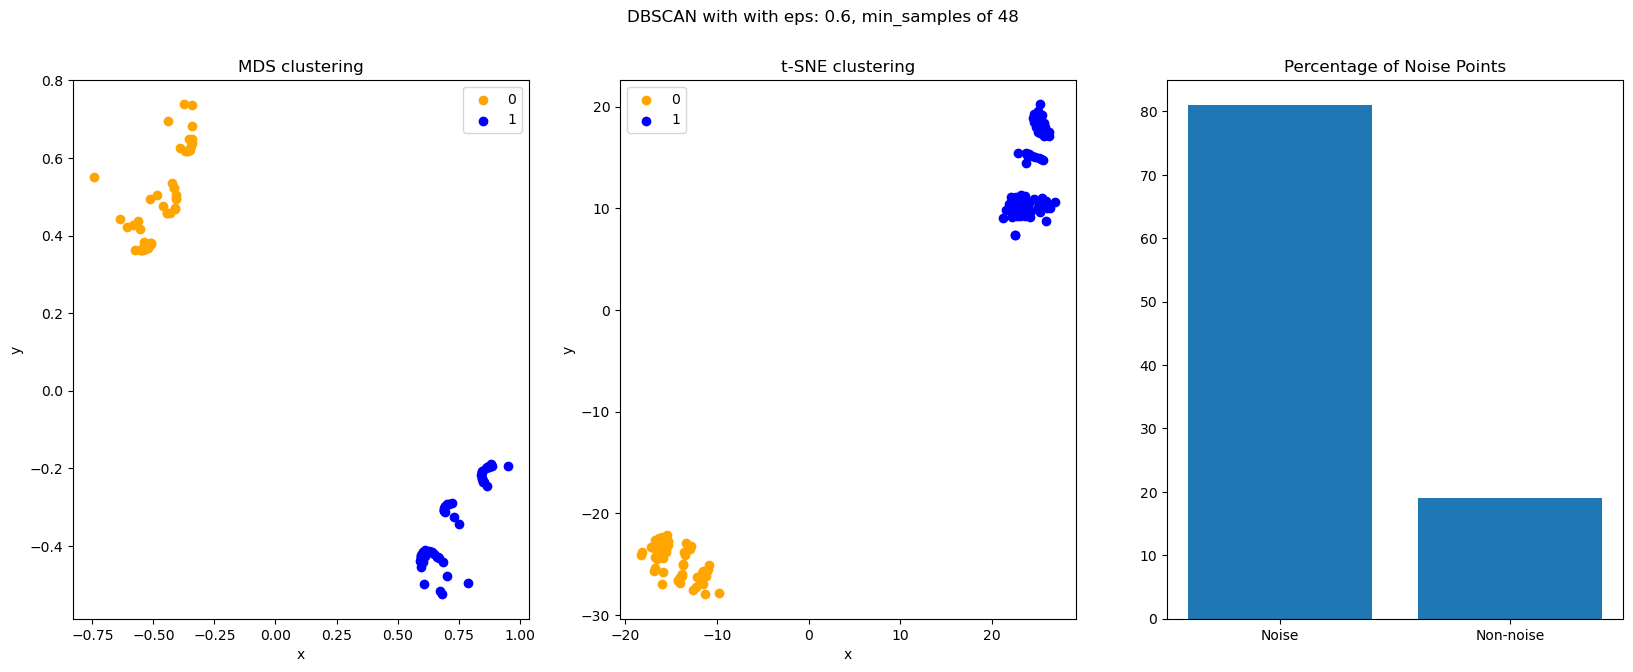

Estimated number of clusters for eps of 0.6 and min_samples of 48: 2.00
Estimated number of noise points for eps of 0.6 and min_samples of 48: 497.00
Unique clusters for eps of 0.6 and min_samples of 48: {0, 1, -1}



In [22]:
# min_sample value of 1.5, 2 and 2.5 times the dataset dimension
# of 16   
min_samples_vals = [24, 32, 48]
eps = np.arange(0.4, 0.7, 0.1)
for e in eps:
    for m in min_samples_vals:
        fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
        fig.set_size_inches(20, 7)

        # Instantiate DBSCAN model with optimal epsilon value of 0.4 and min_samples of 32
        dbscan = cluster.DBSCAN(eps=e, min_samples=m).fit(data_rescaled)
        dbscan_labels = dbscan.labels_

        # Number of clusters in labels, ignoring noise if present.
        n_clusters_ = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
        n_noise_ = list(dbscan_labels).count(-1)
        noise_percentage = (n_noise_ / df.shape[0]) * 100
        non_noise_percentage = ((df.shape[0] - n_noise_) / df.shape[0]) * 100
        noise_dict = {
            'Noise' : noise_percentage,
            'Non-noise': non_noise_percentage
        }

        XYcoordinates_dbscan_mds = manifold.MDS(n_components=2).fit_transform(data_rescaled)
        clustering_scatterplot(ax1,
                               points=XYcoordinates_dbscan_mds, 
                               labels=dbscan_labels,
                               centers=None, 
                               title=f'MDS clustering')

        XYcoordinates_dbscan_tsne = manifold.TSNE(n_components=2).fit_transform(data_rescaled)
        clustering_scatterplot(ax2, 
                               points=XYcoordinates_dbscan_tsne, 
                               labels=dbscan_labels,
                               centers=None, 
                               title=f't-SNE clustering')
        ax3.bar(noise_dict.keys(), noise_dict.values())
        ax3.set_title(f'Percentage of Noise Points')
        plt.suptitle(f'DBSCAN with with eps: {e}, min_samples of {m}')
        plt.show()
        
        print(f'Estimated number of clusters for eps of {e} and min_samples of {m}: {n_clusters_:.2f}')
        print(f'Estimated number of noise points for eps of {e} and min_samples of {m}: {n_noise_:.2f}')
        print(f'Unique clusters for eps of {e} and min_samples of {m}: {set(dbscan_labels)}')
        print('')

### Affinity Propagation

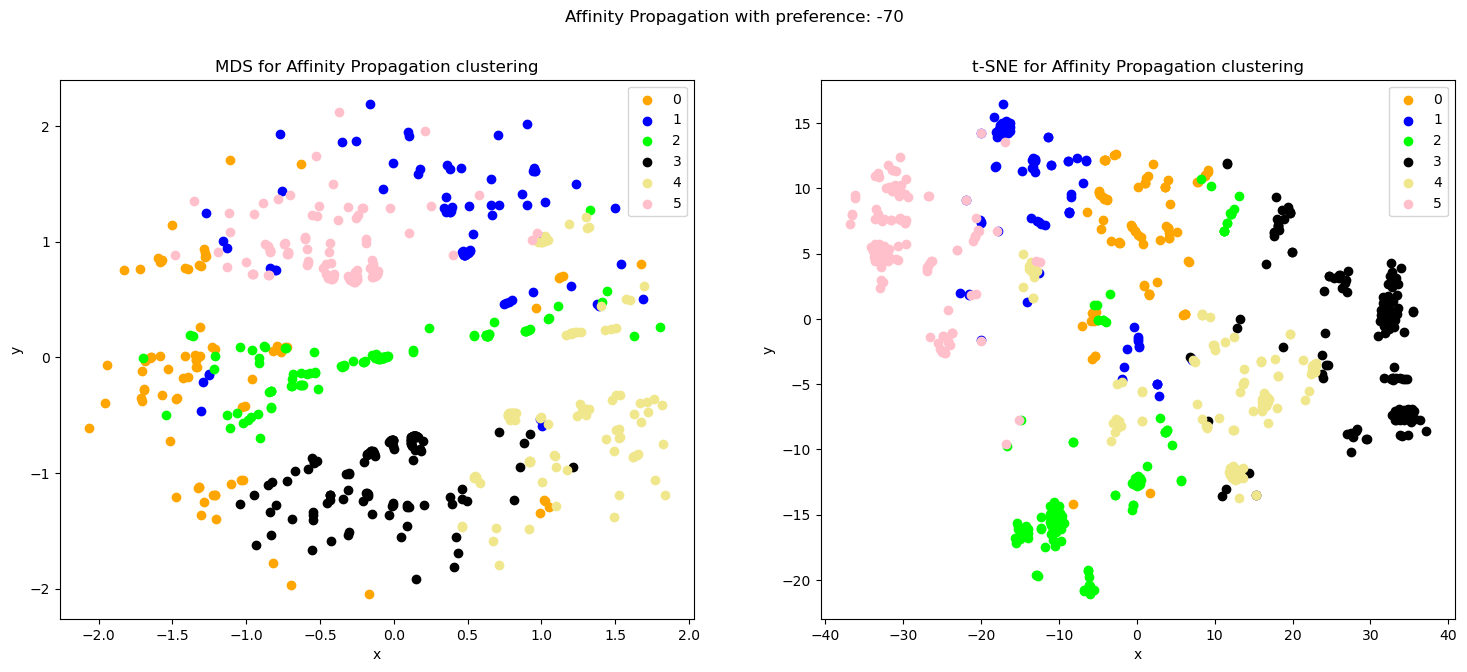

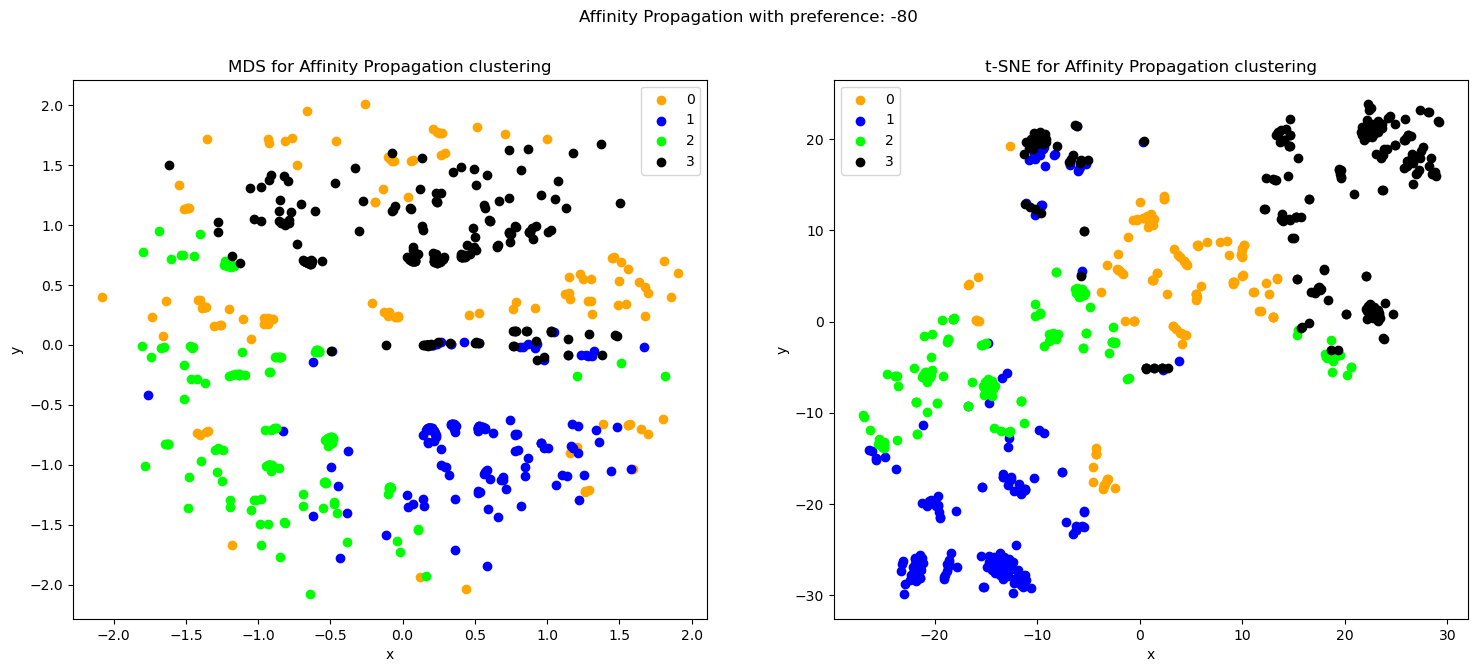

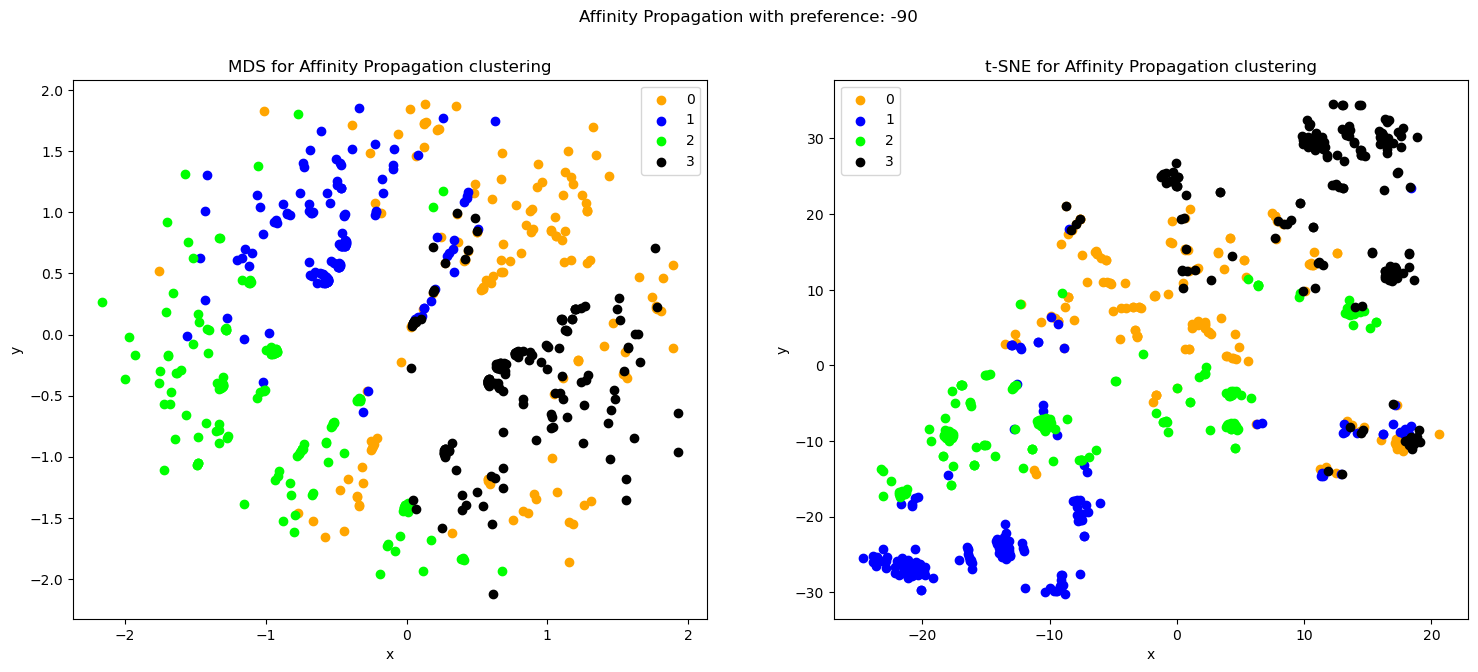

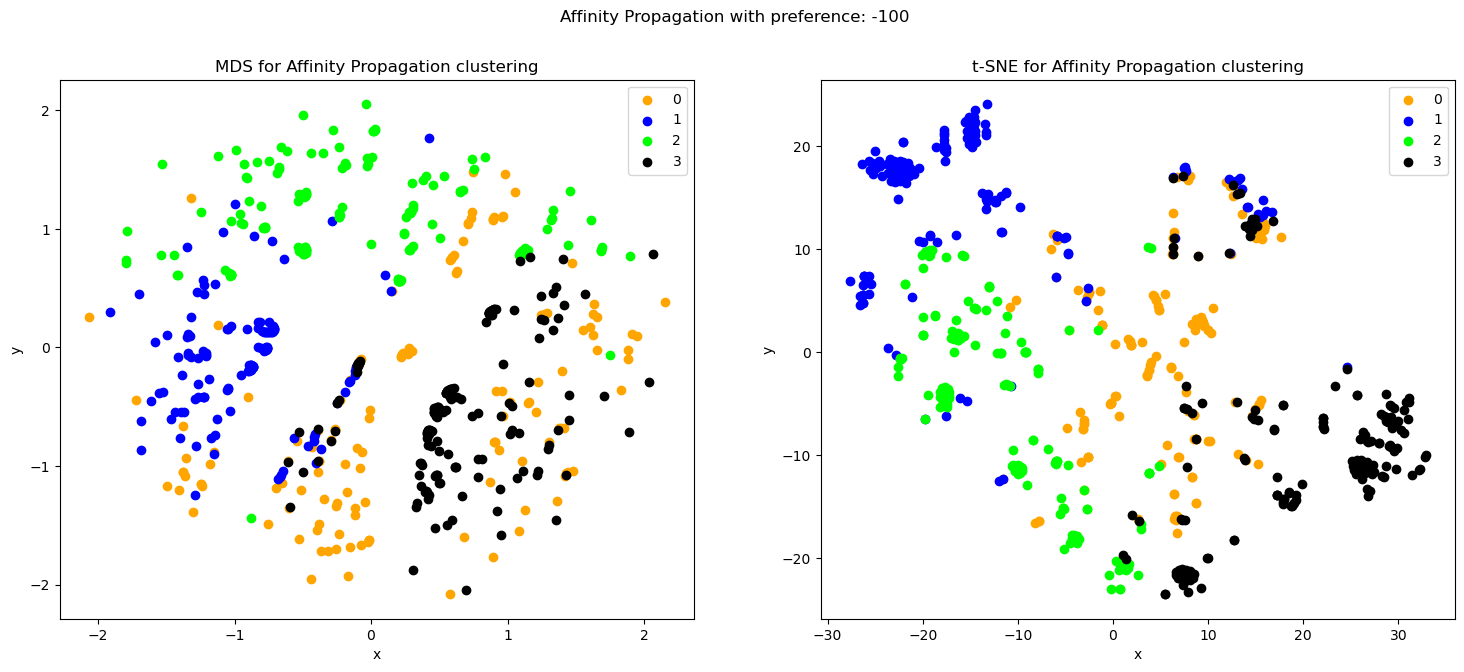

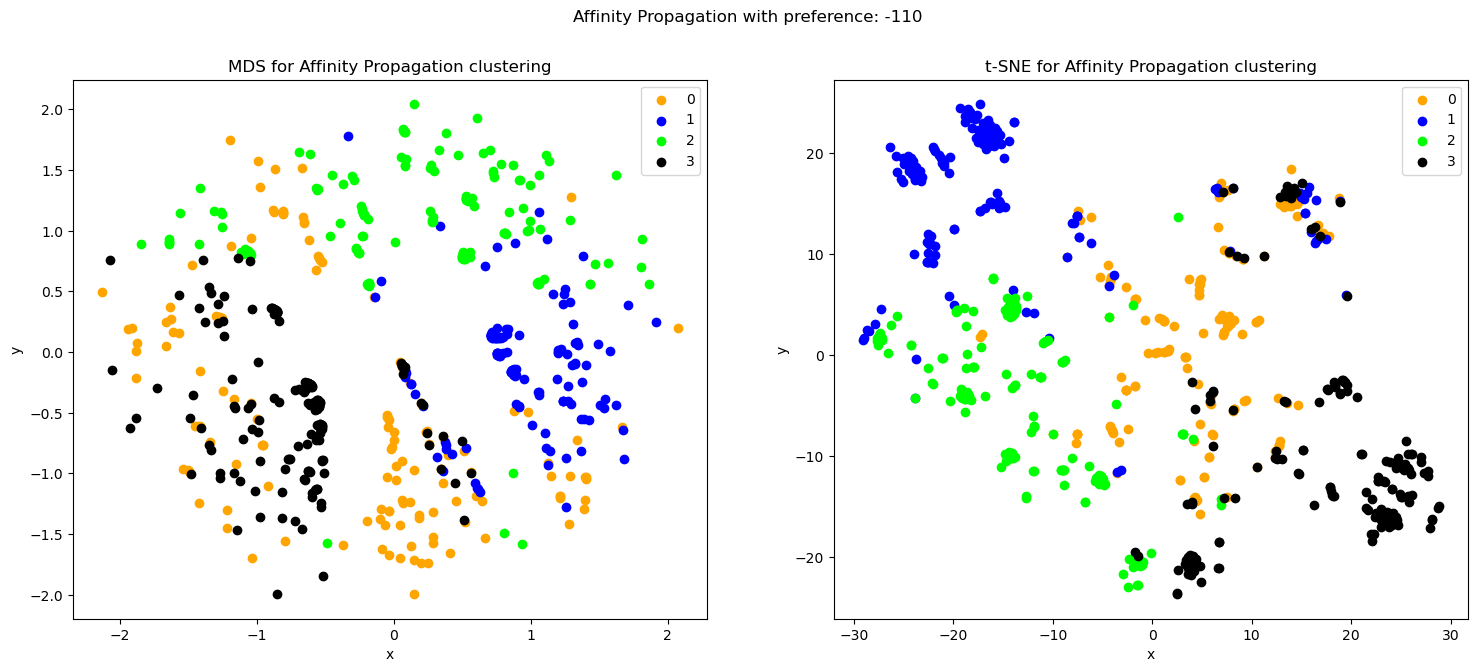

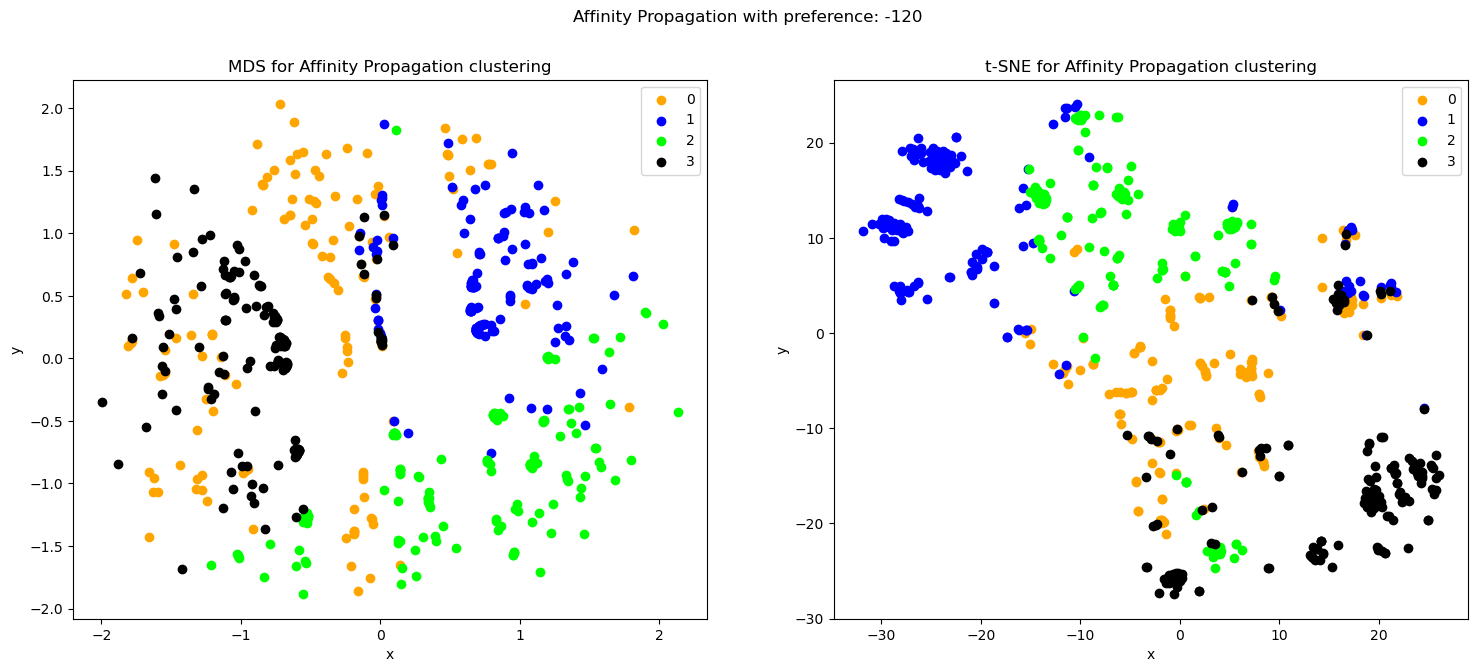

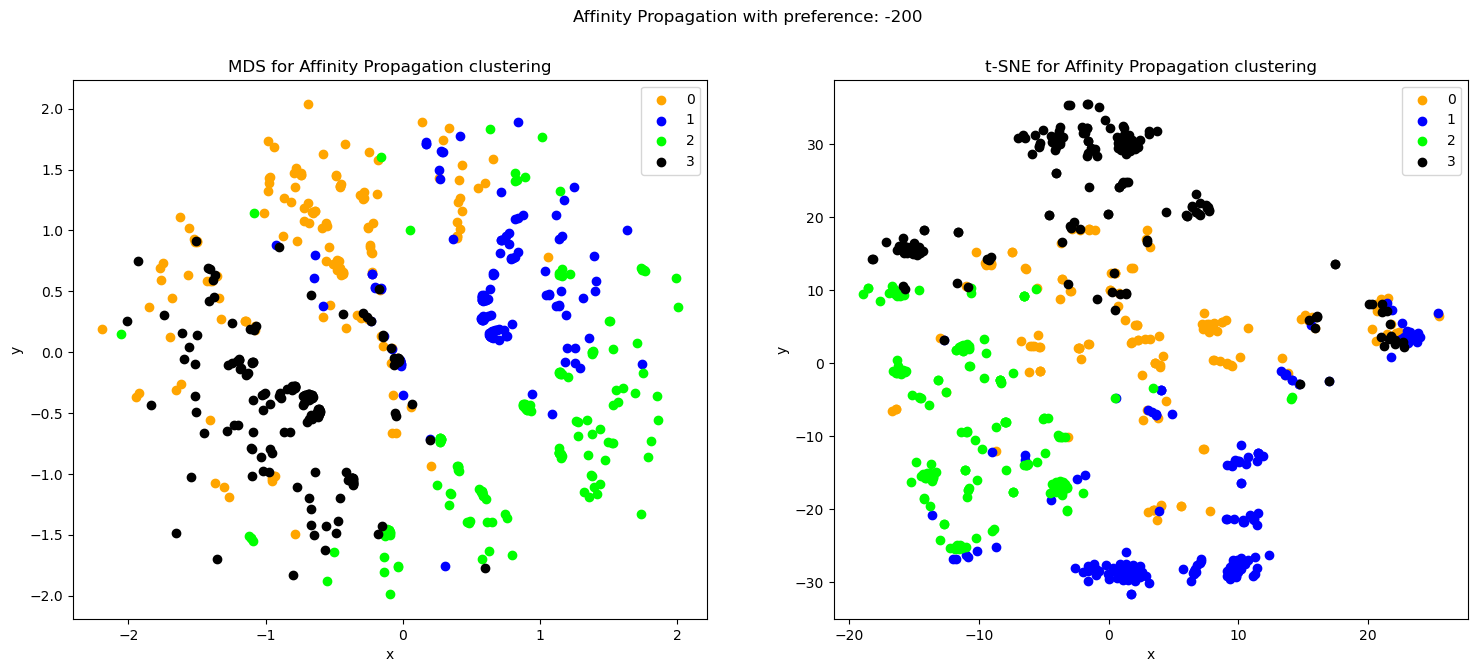

In [23]:
preferences = [-70, -80, -90, -100, -110, -120, -200]

for preference in preferences:
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    ap = cluster.AffinityPropagation(damping=0.95, preference=preference, random_state=42).fit(data_rescaled)
    ap_labels = ap.labels_

    XYcoordinates_ap_mds = manifold.MDS(n_components=2).fit_transform(data_rescaled)
    clustering_scatterplot(ax1,
                           points=XYcoordinates_ap_mds, 
                           labels=ap_labels,
                           centers=None, 
                           title=f'MDS for Affinity Propagation clustering')

    XYcoordinates_ap_tsne = manifold.TSNE(n_components=2).fit_transform(data_rescaled)
    clustering_scatterplot(ax2, 
                           points=XYcoordinates_ap_tsne, 
                           labels=ap_labels,
                           centers=None, 
                           title=f't-SNE for Affinity Propagation clustering')
    plt.suptitle(f'Affinity Propagation with preference: {preference}')

### Discuss the differences between the k-Means clustering and the clustering found by the second algorithm you have tried in words (max 250 words in a markdown cell) and by visualising the clusterings with an appropriate manifold-learning technique

&nbsp;

#### DBSCAN

- Optimal epsilon value identified from plot: 0.4
- Min samples according to documentation: 32 (2 * dimensions = 2 * 16)

Interestingly, using the optimal epsilon and min_samples values as obtained following suggestions in tutorials and documentation yielded only two clusters. For the best epsilon value, a min_samples value of 24 (1.5 times the dimensionality of the dataset compared to twice the dimensionality) yielded three clusters in a similar vein as was identified using K-means.

What’s really concerning with the DBSCAN algorithm is that number of values labeled as noise with all tested values yielding between 70% and 90% noise data points. As such, DBSCAN might not be an appropriate clustering algorithm for this dataset as it is shown to contain to much noisy data.

&nbsp;

#### Affinity Propagation

Preference values investigated: -70, -80, -90, -100, -110, -120, -200

The clustering observed with Affinity Propagation is similar in terms of spread compared to K-means (unlike DBSCAN which has much more condensed clusters with fewer points as noise is excluded). Where K values of 2 and 3 for K-means yielded t-SNE plots where clusters showed clear separation with no overlap, the same cannot be observed for any of the tested Affinity Propagation preference values.

While a preference value of -70 yielded six clusters, values of -80, -90, -100, -110, -120, -200 all yielded four clusters with only the labels assigned to points differing for various preference values. As such, I feel that more investigation needs to be performed to visualise clustering and labels using other methods in order to obtain an optimal preference value.

## Reflection

My peers used several features and clustering techniques which I really wanted to implement, but chose not to as I don't want to copy others' work needlessly. 

Some of these include:

- Using a dendrogram to visual clustering as a tree of Euclidian distances
- Plotting K-means cluster cardinality
- Using other clustering algorithms such as Affinity Propogation and Spectral Clusterting

Furthermore, I used articles on Towards Data Science as inspriration for my work and modified their code for my own purposes. It has been pointed out to me that there are libraries and objects available to reduce coding and workload considerably (e.g. yellowbrick's SilhouetteVisualizer). However, implementing the data manipulation manually for Silhouette sample plotting helped me to understand how it works.

As a final point I'd like to aplogise for the lack of quality work in this notebook. I'm not one to make excuses, but my mother was in a near-fatal accident a week ago and is still recovering in the ICU with new injuries and complications being identified on a daily basis. Balancing work, studies and planning to fly to South Africa has proven rather difficult and distracting. I hope to submit something of higher quality in the next E-tivity.